# Hackathon Santé

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import random 
from sklearn.utils import shuffle
from decimal import Decimal
from sklearn import linear_model
from sklearn import metrics
from sklearn import cluster
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Chargement des données

In [119]:
df_demo = pd.read_excel("/home/jacky/Jacky_Kaub/IMFDI721_KitdataSC/Lesson5/pop.xls",sheetname="2016")
df_hono = pd.read_excel("/home/jacky/Jacky_Kaub/IMFDI721_KitdataSC/Lesson5/hono.xls",sheetname="Spécialistes")

In [120]:
df_demo.head()

,num departement,Departement,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Sexe
0,01,Ain,85701,74232,88712,46157,19966,1
1,02,Aisne,69972,59041,71769,42779,17841,1
2,03,Allier,36354,32647,45208,32178,17008,1
3,04,Alpes-de-Haute-Provence,18113,15040,21758,15916,7957,1
4,05,Hautes-Alpes,16068,14469,19616,12678,6250,1


In [121]:
df_hono.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT,DEPASSEMENTS,FRAIS DE DEPLACEMENT,TOTAL DES HONORAIRES
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4.53008e+06,2.49618e+06,0,7.02626e+06
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4.98526e+06,373838,0,5.3591e+06
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5.1029e+06,560979,0,5.66388e+06
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,nc,nc,nc,nc
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,5,nc,nc,nc,nc


# Nettoyage

In [122]:
#On enlève les lignes total de la df
filtre_total = df_hono["DEPARTEMENT"].str.contains("TOTAL")
filtre_total2 = df_hono["Spécialistes"].str.contains("TOTAL")
df_hono = df_hono.drop(df_hono[filtre_total].index,axis=0)
df_hono = df_hono.drop(df_hono[filtre_total2].index,axis=0)
#On met à 0 les valeurs non communiquées
cols = ["HONORAIRES SANS DEPASSEMENT", "DEPASSEMENTS", "FRAIS DE DEPLACEMENT", "TOTAL DES HONORAIRES"]
try:
    df_hono[cols] = df_hono[cols].replace({'nc':np.nan})
except:
    pass

df_hono.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT,DEPASSEMENTS,FRAIS DE DEPLACEMENT,TOTAL DES HONORAIRES
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4985259.62,373837.57,0.0,5359097.19
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5102901.70,560978.59,0.0,5663880.29
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,NaN,NaN,NaN,NaN
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,5,NaN,NaN,NaN,NaN


# Lien entre densité de medecin par region/departement et dépassement

In [133]:
cols = ["Spécialistes","EFFECTIFS","DEPARTEMENT","EFFECTIFS","DEPASSEMENTS","TOTAL DES HONORAIRES"]
df_hono[cols]
df_hono["DEPASSEMENT MOYEN / MEDECIN"] = df_hono["DEPASSEMENTS"] / df_hono["TOTAL DES HONORAIRES"] / df_hono["EFFECTIFS"]
cols.append("DEPASSEMENT MOYEN / MEDECIN")
cols = ["Spécialistes","EFFECTIFS","DEPARTEMENT", "DEPASSEMENT MOYEN / MEDECIN"]
dff_hono = df_hono[cols].dropna()

,Spécialistes,EFFECTIFS,DEPARTEMENT,DEPASSEMENT MOYEN / MEDECIN
4651,33- Psychiatrie,1308,75- Paris (Ville),0.000332


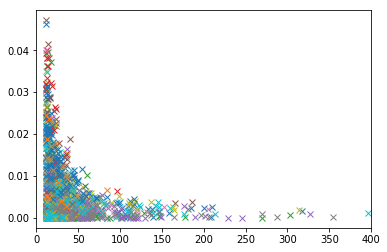

In [158]:
u=[]
for l in df_hono["Spécialistes"].unique():
    u.append(dff_hono[dff_hono["Spécialistes"]==l])

for i in range(len(u)):
    plt.plot(u[i]["EFFECTIFS"],u[i]["DEPASSEMENT MOYEN / MEDECIN"], "x")
    plt.xlim([0,400])